In [14]:
!pip install torchviz

In [15]:
!pip install pytorch_model_summary

In [16]:
import torch
from torch import nn
from torch.autograd import Variable
from torchviz import make_dot, make_dot_from_trace

In [17]:
import torch
from torch import nn
class AYE_MODEL(nn.Module):
    def __init__(self, num_channels=1):
        super(AYE_MODEL, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv6 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv7 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv8 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv9 = nn.Conv2d(64, 32, kernel_size=3, padding=3 // 2,bias=False)
        self.conv10 = nn.Conv2d(32, num_channels, kernel_size=3, padding=3 // 2,bias=False)
        self.relu = nn.PReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.conv5(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.relu(x)
        x = self.conv7(x)
        x = self.relu(x)
        x = self.conv8(x)
        x = self.relu(x)
        x = self.conv9(x)
        x = self.relu(x)
        x = self.conv10(x)
        x = self.relu(x)
        return x
Ayemodel = AYE_MODEL()
print(Ayemodel)

AYE_MODEL(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv9): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv10): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (relu): PReLU(num_parameters=1)
)


In [18]:
# show output shape and hierarchical view of net
from pytorch_model_summary import summary
print(summary(AYE_MODEL(), torch.zeros((1, 1, 28, 28)), show_input=False, show_hierarchical=True))

-----------------------------------------------------------------------
      Layer (type)        Output Shape         Param #     Tr. Param #
          Conv2d-1     [1, 64, 28, 28]             576             576
           PReLU-2     [1, 64, 28, 28]               1               1
          Conv2d-3     [1, 64, 28, 28]          36,864          36,864
          Conv2d-4     [1, 64, 28, 28]          36,864          36,864
          Conv2d-5     [1, 64, 28, 28]          36,864          36,864
          Conv2d-6     [1, 64, 28, 28]          36,864          36,864
          Conv2d-7     [1, 64, 28, 28]          36,864          36,864
          Conv2d-8     [1, 64, 28, 28]          36,864          36,864
          Conv2d-9     [1, 64, 28, 28]          36,864          36,864
         Conv2d-10     [1, 32, 28, 28]          18,432          18,432
         Conv2d-11      [1, 1, 28, 28]             288             288
Total params: 277,345
Trainable params: 277,345
Non-trainable params: 0
----

In [19]:
class SRCNN(nn.Module):
    def __init__(self, num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv4 = nn.Conv2d(64, num_channels, kernel_size=3, padding=3 // 2,bias=False)
        self.pool = nn.MaxPool2d((1,3))
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.conv4(x)
        return x
model = SRCNN()
print(model)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU(inplace=True)
)


In [20]:

class depthwise_separable_conv(nn.Module):
    def __init__(self, nin, nout, kernel_size, padding, bias=False):
        super(depthwise_separable_conv, self).__init__()
        self.depthwise = nn.Conv2d(nin, nin, kernel_size=kernel_size, padding=padding, groups=nin, bias=bias)
        self.pointwise = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)

    def forward(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out

In [21]:
depthwise_separable_conv(64, 128, 3, 1)

depthwise_separable_conv(
  (depthwise): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
  (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
)

In [22]:
#https://github.com/yjn870/SRCNN-pytorch
from torch import nn


class SRCNN(nn.Module):
    def __init__(self, d=32,num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=9, padding=9 // 2,bias=False)
        self.prelu1 = nn.PReLU()
        #self.conv2 = nn.Conv2d(64, 64, kernel_size=5, padding=5 // 2,bias=False)
        self.conv2 = depthwise_separable_conv(64, 64, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu2 = nn.PReLU()
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu3 = nn.PReLU()
        self.conv4 = nn.Conv2d(64, 64, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu4 = nn.PReLU()
        self.conv5 = nn.Conv2d(64, 32, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu5 = nn.PReLU()
        self.conv6 = nn.Conv2d(32, num_channels, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu6 = nn.PReLU()
        self.pool = nn.MaxPool2d((1,1))

    def forward(self, x):
        x = self.prelu1(self.conv1(x))
        x = self.prelu2(self.conv2(x))
        x = self.prelu3(self.conv3(x))
        x = self.prelu4(self.conv4(x))
        x = self.prelu5(self.conv5(x))
        x = self.prelu6(self.conv6(x))
        x = self.pool(x)
        return x
model = SRCNN()
print(model)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4), bias=False)
  (prelu1): PReLU(num_parameters=1)
  (conv2): depthwise_separable_conv(
    (depthwise): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=64, bias=False)
    (pointwise): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (prelu2): PReLU(num_parameters=1)
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (prelu3): PReLU(num_parameters=1)
  (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (prelu4): PReLU(num_parameters=1)
  (conv5): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (prelu5): PReLU(num_parameters=1)
  (conv6): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (prelu6): PReLU(num_parameters=1)
  (pool): MaxPool2d(kernel_size=(1, 1), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
)


In [23]:
# show output shape and hierarchical view of net
from pytorch_model_summary import summary
print(summary(SRCNN(), torch.zeros((1, 1, 28, 28)), show_input=False, show_hierarchical=True))

----------------------------------------------------------------------------------
                 Layer (type)        Output Shape         Param #     Tr. Param #
                     Conv2d-1     [1, 64, 28, 28]           5,184           5,184
                      PReLU-2     [1, 64, 28, 28]               1               1
   depthwise_separable_conv-3     [1, 64, 28, 28]           5,696           5,696
                      PReLU-4     [1, 64, 28, 28]               1               1
                     Conv2d-5     [1, 64, 28, 28]         102,400         102,400
                      PReLU-6     [1, 64, 28, 28]               1               1
                     Conv2d-7     [1, 64, 28, 28]         102,400         102,400
                      PReLU-8     [1, 64, 28, 28]               1               1
                     Conv2d-9     [1, 32, 28, 28]          51,200          51,200
                     PReLU-10     [1, 32, 28, 28]               1               1
               

In [24]:
# show output shape and hierarchical view of net
from pytorch_model_summary import summary
print(summary(SRCNN(), torch.zeros((1, 1, 28, 28)), show_input=True, show_hierarchical=True))

----------------------------------------------------------------------------------
                 Layer (type)         Input Shape         Param #     Tr. Param #
                     Conv2d-1      [1, 1, 28, 28]           5,184           5,184
                      PReLU-2     [1, 64, 28, 28]               1               1
   depthwise_separable_conv-3     [1, 64, 28, 28]           5,696           5,696
                      PReLU-4     [1, 64, 28, 28]               1               1
                     Conv2d-5     [1, 64, 28, 28]         102,400         102,400
                      PReLU-6     [1, 64, 28, 28]               1               1
                     Conv2d-7     [1, 64, 28, 28]         102,400         102,400
                      PReLU-8     [1, 64, 28, 28]               1               1
                     Conv2d-9     [1, 64, 28, 28]          51,200          51,200
                     PReLU-10     [1, 32, 28, 28]               1               1
               

In [25]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model)

+------------------------+------------+
|        Modules         | Parameters |
+------------------------+------------+
|      conv1.weight      |    5184    |
|     prelu1.weight      |     1      |
| conv2.depthwise.weight |    1600    |
| conv2.pointwise.weight |    4096    |
|     prelu2.weight      |     1      |
|      conv3.weight      |   102400   |
|     prelu3.weight      |     1      |
|      conv4.weight      |   102400   |
|     prelu4.weight      |     1      |
|      conv5.weight      |   51200    |
|     prelu5.weight      |     1      |
|      conv6.weight      |    800     |
|     prelu6.weight      |     1      |
+------------------------+------------+
Total Trainable Params: 267686


267686

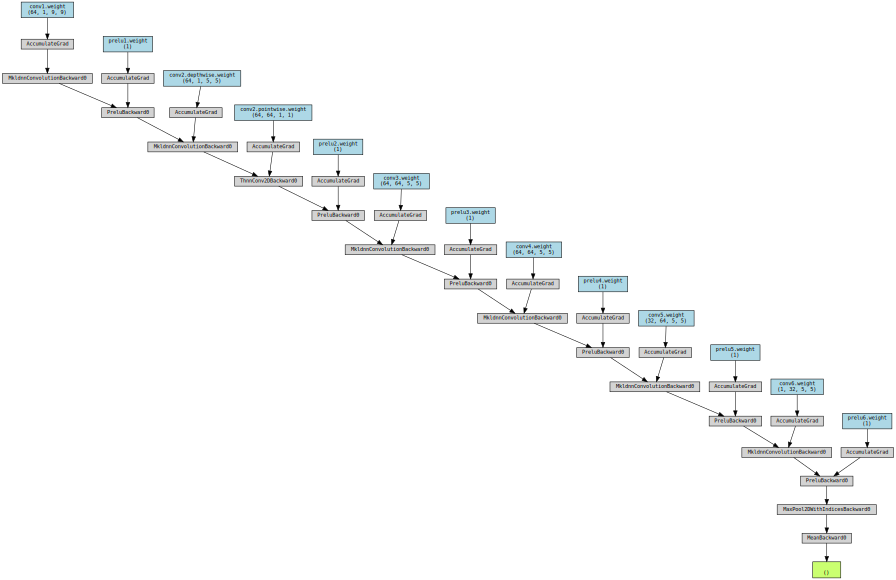

In [26]:
x = Variable(torch.randn(1,1,33,33))
y = model(x)
make_dot(y.mean(),params=dict(model.named_parameters()))